In [1]:
%matplotlib notebook
#import SimpleITK as sitk
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.Transforms import Resample, Compose, RandomIntensityShiftScale, ElasticDeformation, RandomTranslate, RandomRotate, RandomScale, Input_to_Center, FitFixedAR, Origin_to_Output_Center, trunc_images

In [2]:
data = {"images":[".\\images_cropped\\test\\"+str(id)+".jpg" for id in range(105)], "landmarks":[".\\landmarks_cropped\\test\\"+str(id)+".txt" for id in range(105)]}

In [3]:
data

{'images': ['.\\images_cropped\\test\\0.jpg',
  '.\\images_cropped\\test\\1.jpg',
  '.\\images_cropped\\test\\2.jpg',
  '.\\images_cropped\\test\\3.jpg',
  '.\\images_cropped\\test\\4.jpg',
  '.\\images_cropped\\test\\5.jpg',
  '.\\images_cropped\\test\\6.jpg',
  '.\\images_cropped\\test\\7.jpg',
  '.\\images_cropped\\test\\8.jpg',
  '.\\images_cropped\\test\\9.jpg',
  '.\\images_cropped\\test\\10.jpg',
  '.\\images_cropped\\test\\11.jpg',
  '.\\images_cropped\\test\\12.jpg',
  '.\\images_cropped\\test\\13.jpg',
  '.\\images_cropped\\test\\14.jpg',
  '.\\images_cropped\\test\\15.jpg',
  '.\\images_cropped\\test\\16.jpg',
  '.\\images_cropped\\test\\17.jpg',
  '.\\images_cropped\\test\\18.jpg',
  '.\\images_cropped\\test\\19.jpg',
  '.\\images_cropped\\test\\20.jpg',
  '.\\images_cropped\\test\\21.jpg',
  '.\\images_cropped\\test\\22.jpg',
  '.\\images_cropped\\test\\23.jpg',
  '.\\images_cropped\\test\\24.jpg',
  '.\\images_cropped\\test\\25.jpg',
  '.\\images_cropped\\test\\26.jpg',
 

In [4]:
def plot_image(img, landmarks):
    plt.imshow(img, cmap="gray")
    plt.scatter(landmarks[:,0], landmarks[:,1], s=0.5)
    plt.show()

43


<IPython.core.display.Javascript object>


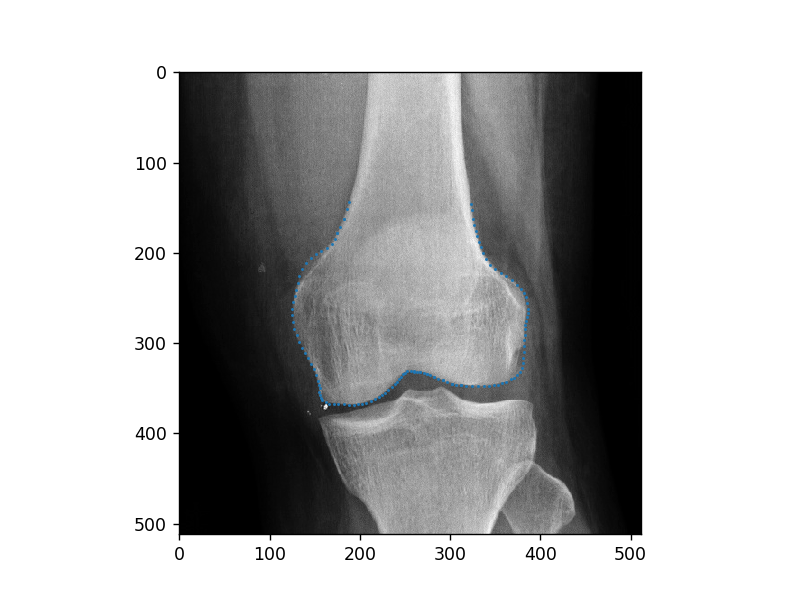

In [7]:
index = np.random.randint(0, 105)
print(index)
mode = cv2.IMREAD_GRAYSCALE
plot_image(cv2.imread(data['images'][index], mode), np.loadtxt(data['landmarks'][index]))

In [8]:
counter = 105
for index  in range(105):
    img , landmarks = cv2.imread(data['images'][index], mode), np.loadtxt(data['landmarks'][index])
    for i in range(8):
        transform = Compose(transformations=[Input_to_Center(img), RandomTranslate(img), RandomRotate(img, [0.2]), Origin_to_Output_Center(), ElasticDeformation(img) ]) #RandomRotate(img), RandomScale(img), ElasticDeformation(img)
        img_aug, landmarks_aug = Resample(img, landmarks, transform)
        img_aug = RandomIntensityShiftScale(img_aug)
        cv2.imwrite(".\\images_cropped\\test\\"+str(counter)+".jpg", img_aug )
        np.savetxt(".\\landmarks_cropped\\test\\"+str(counter)+".txt", landmarks_aug)
        counter += 1

In [25]:
counter, index, i

(1131, 102, 3)

<IPython.core.display.Javascript object>


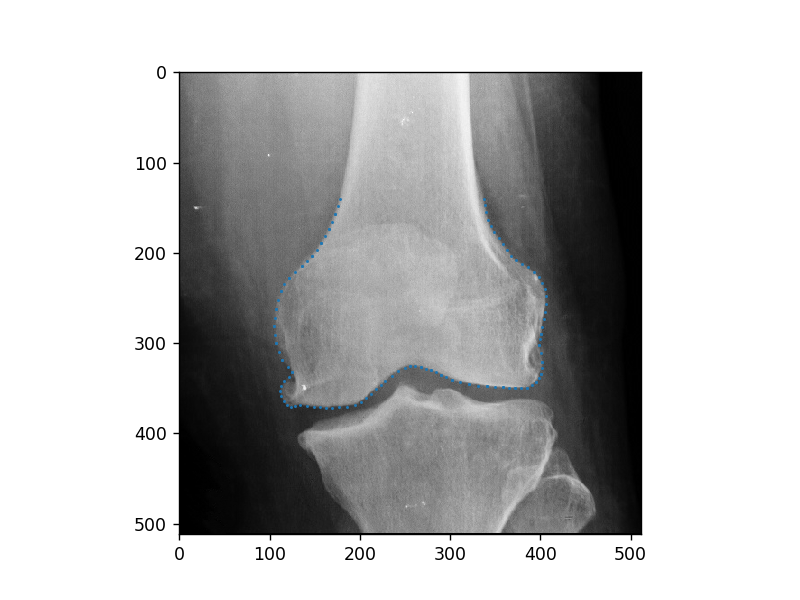

In [27]:
index = np.random.randint(0, 210)
img , landmarks = cv2.imread(data['images'][index], mode), np.loadtxt(data['landmarks'][index])
transform = Compose(transformations=[Input_to_Center(img), RandomTranslate(img), RandomRotate(img, [.2]), Origin_to_Output_Center(), ElasticDeformation(img) ]) #RandomRotate(img), RandomScale(img), ElasticDeformation(img)
img_aug, landmarks_aug = Resample(img, landmarks, transform)
img_aug = RandomIntensityShiftScale(img_aug)
plot_image(img, landmarks)

In [25]:
def show_intensity_histogram(image):
    image_grayscale = image
    plt.hist(image_grayscale.ravel(), 256)
    plt.title('Intensity histogram')
    plt.ylabel('Number of pixels')
    plt.xlabel('Light intensity')
    plt.show()

In [29]:
def compute_otsu_mask(image):
    image_grayscale = image
    return cv2.threshold(image_grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [33]:
def show_mask(mask, image, title='', mask_color=255):
    display_image = image.copy()
    display_image[mask != 0] = mask_color
    plt.imshow(display_image, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

195


<IPython.core.display.Javascript object>


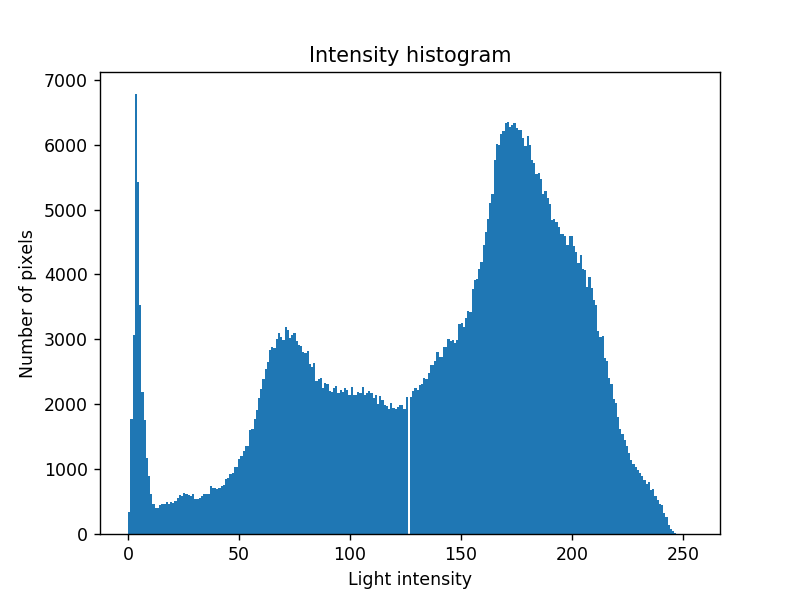

In [77]:
index = np.random.randint(0, 210)
print(index)
img , landmarks = cv2.imread(data['images'][index], mode), np.loadtxt(data['landmarks'][index])
show_intensity_histogram(img)

<IPython.core.display.Javascript object>


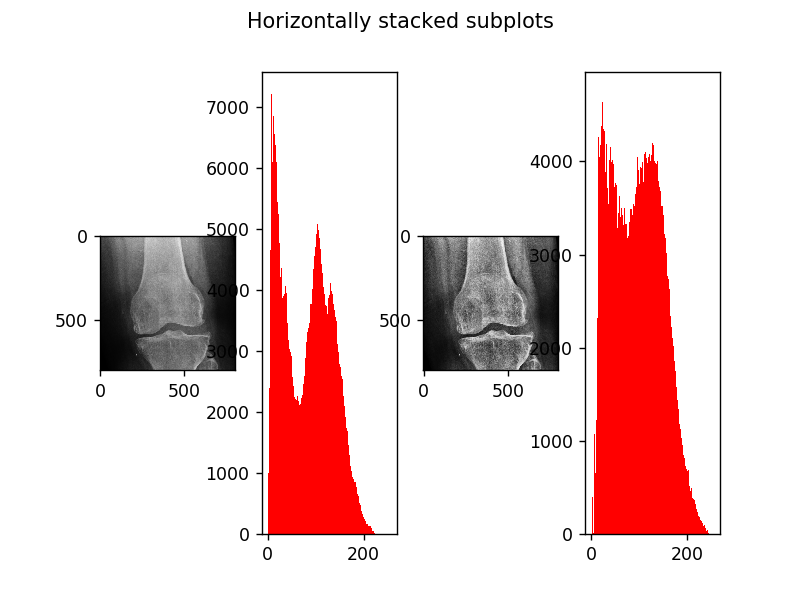

In [106]:
index = np.random.randint(0, 210)
img , landmarks = cv2.imread(data['images'][index], mode), np.loadtxt(data['landmarks'][index])
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(img, 'gray')
ax2.hist(img.flatten(),256,[0,256], color = 'r')
ax3.imshow(cl1, 'gray')
ax4.hist(cl1.flatten(),256,[0,256], color = 'r')
plt.show()

255


<IPython.core.display.Javascript object>


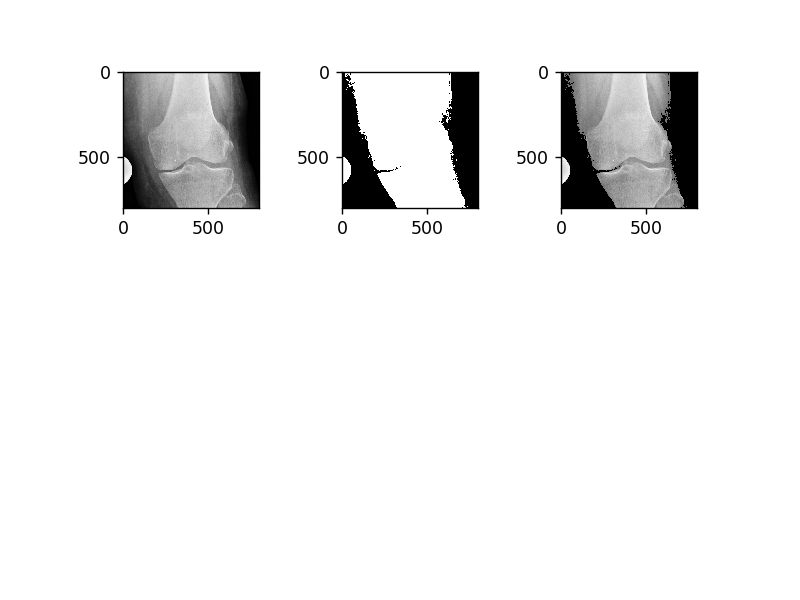

In [73]:
mask_otsu = compute_otsu_mask(img)
print(mask_otsu.max())
mask_otsu = mask_otsu.astype(np.float32)
mask_otsu /= 255.

plt.subplot(3,3,1),plt.imshow(img,'gray')
plt.subplot(3,3,2),plt.imshow(mask_otsu, 'gray')
plt.subplot(3,3,3),plt.imshow(img*mask_otsu,'gray')
plt.show()
#show_mask(mask_otsu, img, title='Otsu grayscale thresholding')

<IPython.core.display.Javascript object>


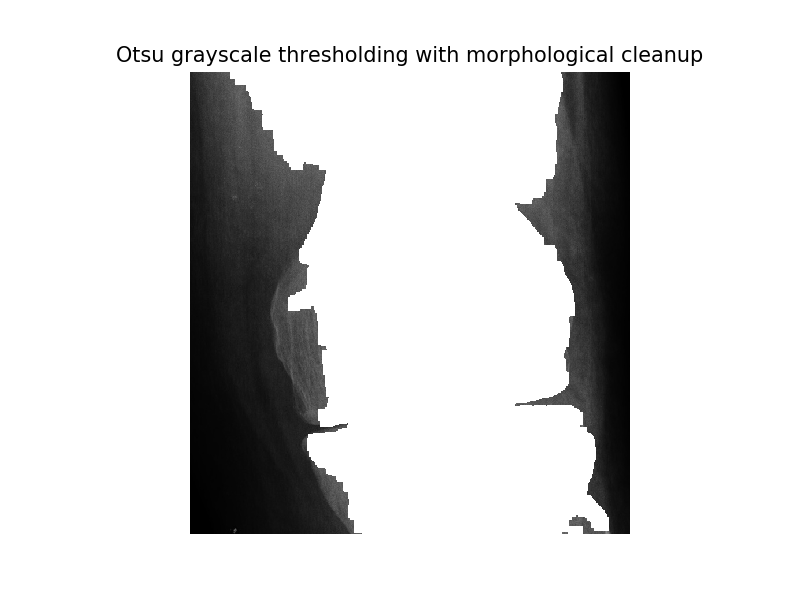

In [40]:
kernel = np.ones((5, 5), np.uint8)

mask_otsu_clean = cv2.morphologyEx(mask_otsu, cv2.MORPH_OPEN, kernel, iterations=2)
mask_otsu_clean = cv2.erode(mask_otsu_clean, kernel, iterations=2)
mask_otsu_clean = cv2.dilate(mask_otsu_clean, kernel, iterations=5)

show_mask(mask_otsu_clean, img, title='Otsu grayscale thresholding with morphological cleanup')